In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading datasent into Jupyter Notebook
df_data = pd.read_csv('/Users/nenelix3/Desktop/DSRemote_Homework/FinalProject_Data.csv')

In [3]:
#Looking at features available in dataset
df_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [5]:
#Looking to clean data
df_data.head(10)

#There are many NaN in the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
df_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Looking at descriptive statistics for SalePrice
print(df_data.SalePrice.describe())

print('\nThe mean house price is: ', df_data.SalePrice.mean(axis = 0))
print('\nThe median house price is: ', df_data.SalePrice.median(axis = 0))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The mean house price is:  180921.19589041095

The median house price is:  163000.0


In [8]:
#Looking at descriptive statistics for OverallQual
print(df_data.OverallQual.describe())

#But this doesn't make sense as a continuous variable, will be converting to string below

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


Skew:  1.88287575977
Kurtosis:  6.53628186006


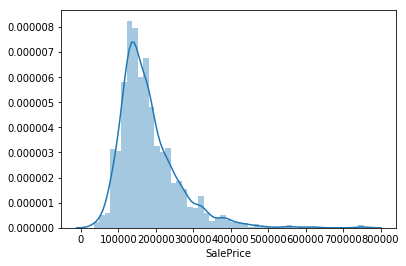

In [9]:
#Create a historgram of SalePrice to look at distribution
sns.distplot(df_data.SalePrice)

#Data for SalePrice is positively skewed
print('Skew: ', df_data.SalePrice.skew())
print('Kurtosis: ', df_data.SalePrice.kurt())

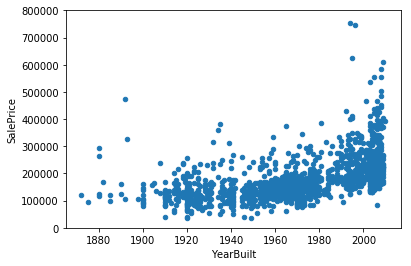

In [10]:
#Graphing numerical variables against SalePrice to see correlation
#First: YearBuilt
graph_data = pd.concat([df_data['SalePrice'], df_data['YearBuilt']], axis = 1)
graph_data.plot.scatter(x ='YearBuilt', y ='SalePrice', ylim =(0,800000));

#Positive Relationship, but while the type is int64, Year is actually categorical, so let's look at this as a boxplot

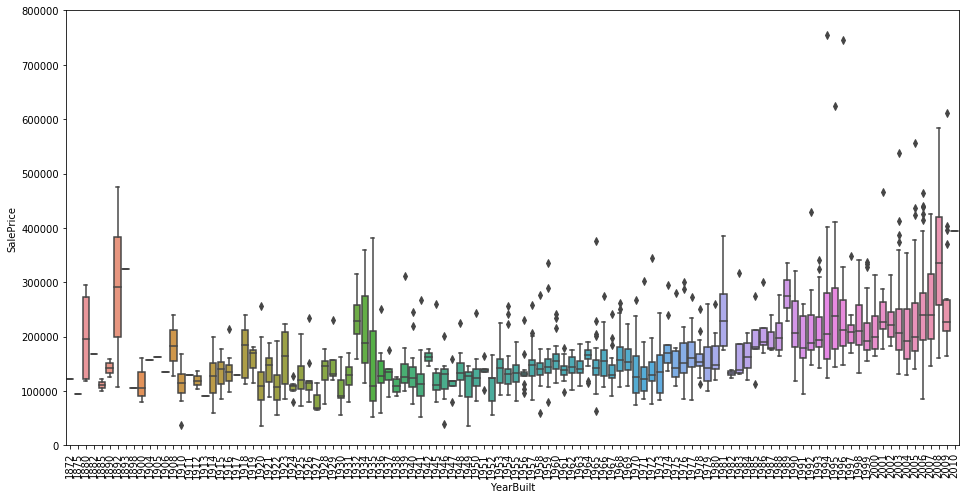

In [11]:
xvar = 'YearBuilt'
data = pd.concat([df_data['SalePrice'], df_data[xvar]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=xvar, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

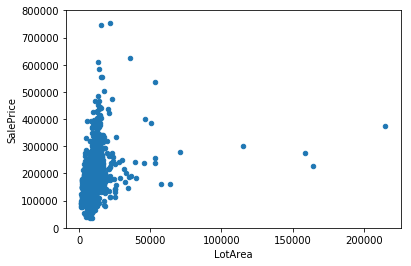

In [12]:
#Second: LotArea

graph_data2 = pd.concat([df_data['SalePrice'], df_data['LotArea']], axis = 1)
graph_data2.plot.scatter(x = 'LotArea', y = 'SalePrice' , ylim = (0, 800000))

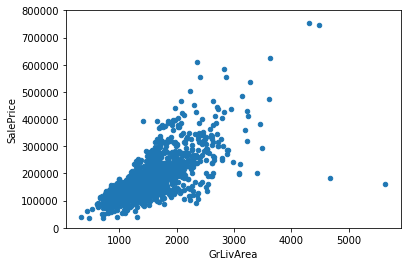

In [13]:
#Third GrLivArea

graph_data3 = pd.concat([df_data['SalePrice'], df_data['GrLivArea']], axis = 1)
graph_data3.plot.scatter(x = 'GrLivArea', y = 'SalePrice' , ylim = (0, 800000))

In [14]:
#Will want to drop outliers
df_data = df_data.drop(df_data[(df_data['GrLivArea']>4000) & (df_data['SalePrice']<300000)].index)

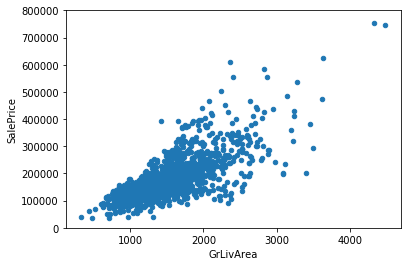

In [15]:
#Run graphic again
graph_data4 = pd.concat([df_data['SalePrice'], df_data['GrLivArea']], axis = 1)
graph_data4.plot.scatter(x = 'GrLivArea', y = 'SalePrice' , ylim = (0, 800000))

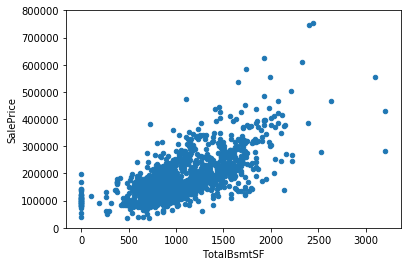

In [16]:
#Fourth TotalBsmtSF

graph_data5 = pd.concat([df_data['SalePrice'], df_data['TotalBsmtSF']], axis = 1)
graph_data5.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice' , ylim = (0, 800000))

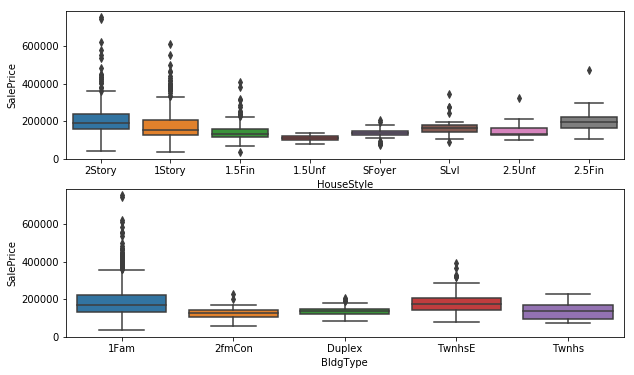

In [17]:
#Looking into categorical feature relationships with SalePrice. Specifically HouseStyle, BldgType, ExterQual, and Street
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df_data, ax = ax[0])
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df_data, ax = ax[1])
plt.show()

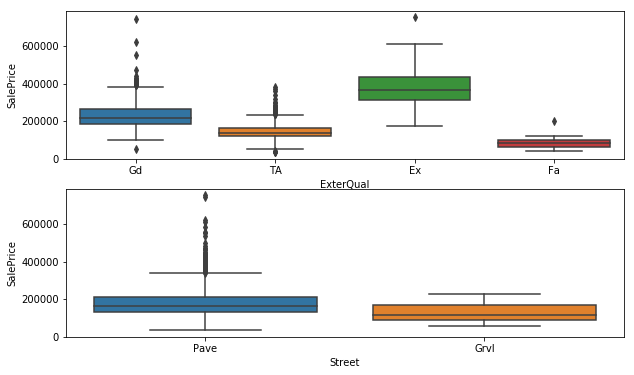

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df_data, ax = ax[0])
sns.boxplot(x = 'Street', y = 'SalePrice', data = df_data, ax = ax[1])
plt.show()

In [19]:
#Analyzing the relationship between SalePrice and other variables using correlation matrix

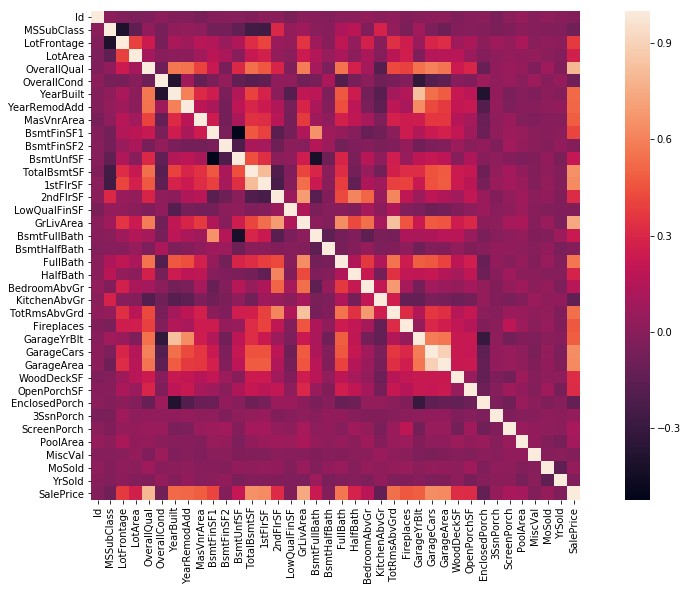

In [20]:
corr_matrix = df_data.corr()
f, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(corr_matrix, vmax = None, square = True)

#Quick overview: can see that the Garage variables are highly correlated, but that is because they are intrinsically
#tied together as variables

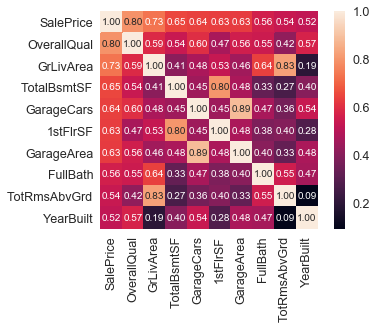

In [21]:
#Create a correlation matrix specifically for SalePrice

k = 10
corr_columns = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_data[corr_columns].values.T)
sns.set(font_scale = 1.25)
heatm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = corr_columns.values, xticklabels = corr_columns.values)
plt.show()

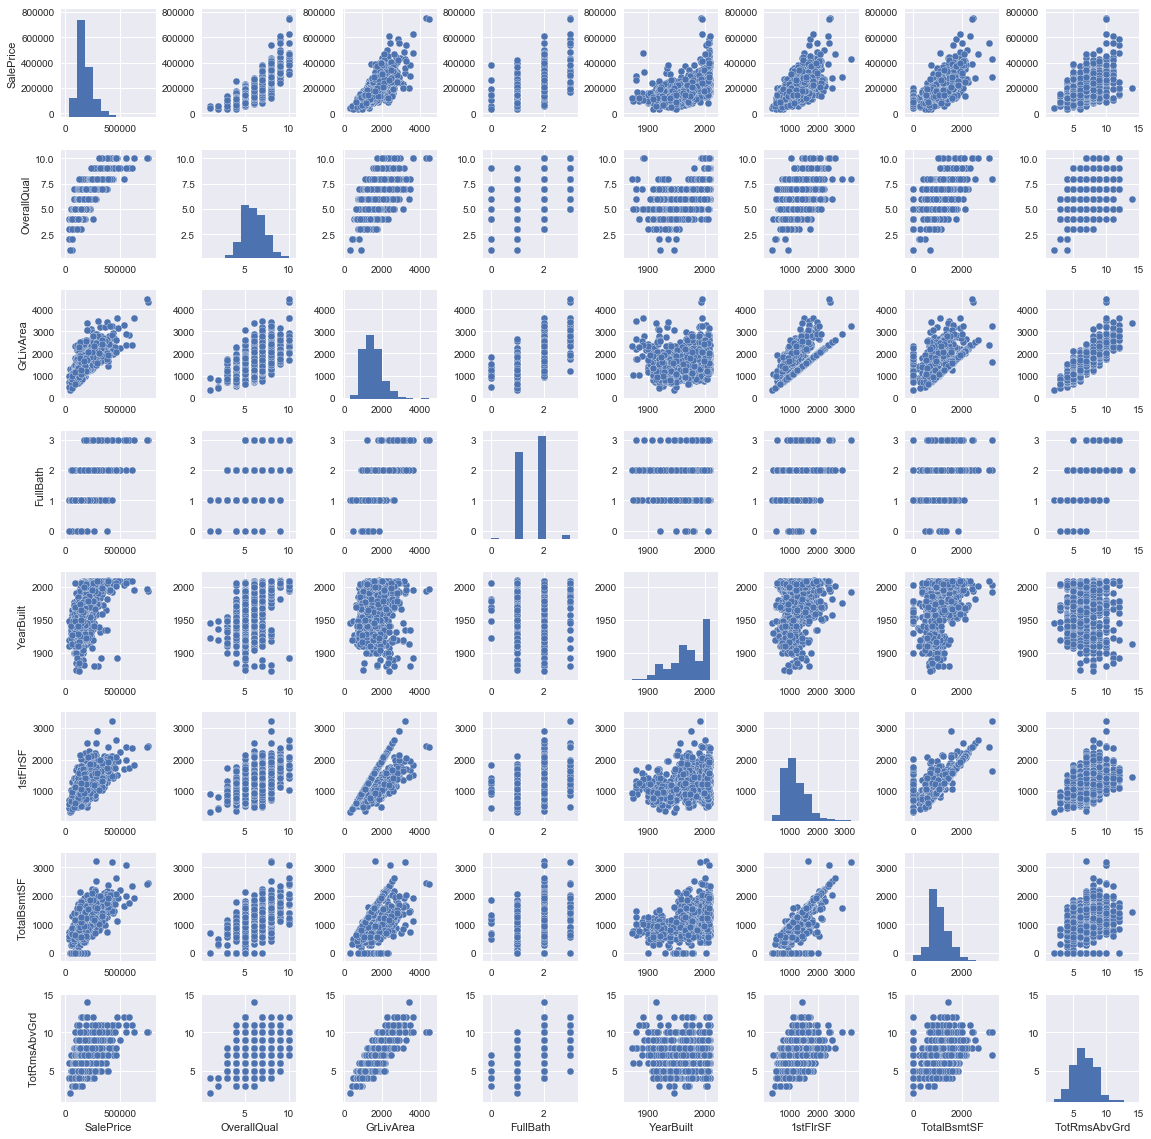

In [22]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'FullBath', 'YearBuilt' , '1stFlrSF', 'TotalBsmtSF', 'TotRmsAbvGrd']
sns.pairplot(df_data[cols], size = 2)
plt.show()

In [23]:
#Looking for missing values within certain features

TotalMiss = df_data.isnull().sum().sort_values(ascending = False)
TotalMissPercent = (df_data.isnull().sum() / df_data.isnull().count()).sort_values(ascending = False)
Final_Missing = pd.concat([TotalMiss, TotalMissPercent], axis = 1, keys = ['Total Missing', 'Percent'])
Final_Missing.head(30)

#Here can see that certain features, PoolQC, MiscFeature, Alley, Fence, and FireplaceQu are mostly missing values.
#Will be filling in those values

,Total Missing,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


In [24]:
#Filling in values
df_data.Alley = df_data.Alley.fillna('None')
df_data.LotFrontage = df_data.LotFrontage.fillna(df_data.LotFrontage.mean())
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df_data[col] = df_data[col].fillna('None')
df_data.OverallCond = df_data.OverallCond.astype(str)
df_data.KitchenAbvGr = df_data.KitchenAbvGr.astype(str)
df_data.KitchelQual = df_data.KitchenQual.fillna(df_data.KitchenQual.mode()[0])
df_data.Electrical = df_data.Electrical.fillna(df_data.Electrical.mode()[0])
for col in ('GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual'):
    df_data[col] = df_data[col].fillna('None')
df_data.FireplaceQu = df_data.FireplaceQu.fillna('None')
df_data.YrSold = df_data.YrSold.astype(str)
df_data.YearBuilt = df_data.YearBuilt.astype(str)
df_data.MoSold = df_data.MoSold.astype(str)
df_data.YearRemodAdd = df_data.YearRemodAdd.astype(str)
df_data.TotalBsmtSF = df_data.TotalBsmtSF.fillna(0)
df_data.GarageCars = df_data.GarageCars.fillna(0)
df_data.SaleType = df_data.SaleType.fillna(df_data.SaleType.mode()[0])


#Creating total square footage feature
df_data['TotalSF'] = df_data['TotalBsmtSF'] + df_data['1stFlrSF'] + df_data['2ndFlrSF']
df_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [25]:
#Dropping columns I don't think are necessary

df_data.drop(['Fence', 'PoolQC', 'PoolArea', 'Id', 'MiscFeature', 'MiscVal', 'Functional', 'MasVnrArea', 'WoodDeckSF', 
              '3SsnPorch', 'MasVnrType'], axis = 1, inplace = True)

In [26]:
#Looking at data again
df_data.head(10)

#13 Columns removed. How does that affect our MSE?

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.000000,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,Y,61,0,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.000000,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,Y,0,0,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.000000,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,Y,42,0,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.000000,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,Y,35,272,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.000000,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,Y,84,0,0,12,2008,WD,Normal,250000,3343
5,50,RL,85.000000,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,Y,30,0,0,10,2009,WD,Normal,143000,2158
6,20,RL,75.000000,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,Y,57,0,0,8,2007,WD,Normal,307000,3380
7,60,RL,69.797331,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,Y,204,228,0,11,2009,WD,Normal,200000,3197
8,50,RM,51.000000,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,Y,0,205,0,4,2008,WD,Abnorml,129900,2726
9,190,RL,50.000000,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,Y,4,0,0,1,2008,WD,Normal,118000,2068


In [27]:
#Getting dummy variables
df_data = pd.get_dummies(df_data)

df_data

,MSSubClass,LotFrontage,LotArea,OverallQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,706,0,150,0,1710,1,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000000,9600,6,978,0,284,0,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000000,11250,7,486,0,434,0,1786,1,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000000,9550,7,216,0,540,0,1717,1,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000000,14260,8,655,0,490,0,2198,1,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,732,0,64,0,1362,1,...,0,0,0,1,0,0,0,0,1,0
6,20,75.000000,10084,8,1369,0,317,0,1694,1,...,0,0,0,1,0,0,0,0,1,0
7,60,69.797331,10382,7,859,32,216,0,2090,1,...,0,0,0,1,0,0,0,0,1,0
8,50,51.000000,6120,7,0,0,952,0,1774,0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.000000,7420,5,851,0,140,0,1077,1,...,0,0,0,1,0,0,0,0,1,0


In [28]:
#Choosing independent and dependent variables
feature_cols = df_data.columns.drop('SalePrice')
X = df_data[feature_cols]
y = df_data.SalePrice

#Importing necessary classes to run simple linear regression
from sklearn.linear_model import LinearRegression

#Training the model to the raw dataset and predicting the values for X
linreg = LinearRegression()
linreg.fit(X, y)
linreg.predict(X)

array([ 202604.20501709,  208071.34563947,  212100.58010244, ...,
        286965.75914001,  145546.33823633,  144579.64974737])

In [29]:
#Showing the intercet and coefficients for each beta
print(linreg.intercept_)
print(linreg.coef_)

1427813222.48
[ -6.90241079e+01   1.10941726e+02   8.55234356e-01   5.44824922e+03
   3.22024140e+11   3.22024140e+11   3.22024140e+11  -3.22024140e+11
   3.22024140e+11   2.11179319e+03   2.25256217e+03   4.10042763e+03
   2.82208637e+03  -5.04588178e+03   4.36365684e+01   5.87406207e+03
   6.75555105e+03  -4.91229248e+00   9.67593384e+00   9.00402832e+00
   3.42191620e+01  -3.22024139e+11   1.86737116e+08   1.86778037e+08
   1.86763060e+08   1.86771567e+08   1.86761486e+08  -1.96598984e+08
  -1.96569311e+08  -4.03972034e+08  -4.03972453e+08  -4.03974170e+08
  -1.07082905e+08  -1.07084012e+08  -1.07084010e+08  -1.07081696e+08
   9.64398110e+06   9.64889826e+06   9.63516804e+06   9.64251201e+06
  -4.08357022e+05  -4.27714596e+05  -4.56933534e+08  -4.56924172e+08
  -4.56941405e+08  -4.56951902e+08  -4.56934878e+08   1.92448463e+08
   1.92449476e+08   1.92388873e+08  -2.95463484e+06  -2.94501347e+06
  -2.94058191e+06  -2.95560354e+06  -2.96631381e+06  -2.96113256e+06
  -2.94733039e+06  -

In [30]:
#Caputring the predictions for X to use in MSE
y_prediction = linreg.predict(X)

In [31]:
#MSE from previous model, trying a Test/Train split next to see the outcome
from sklearn import metrics

print(metrics.mean_squared_error(y, y_prediction))

326673197.128


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1458, 563) (1458,)
(1093, 563) (1093,)
(365, 563) (365,)


In [34]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train)

print(metrics.mean_squared_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_test, y_pred_test))

249996862.401
7.48091212628e+16


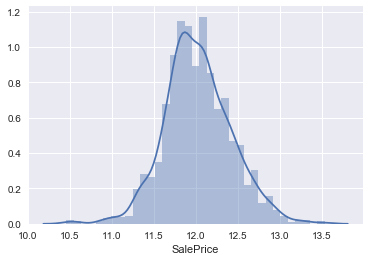

In [36]:
#High MSE for both tries, will try to normalize the data in order to fit the probability line better
df_data.SalePrice = np.log(df_data.SalePrice)
sns.distplot(df_data.SalePrice)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.39853206929765123, 12.024008660964794, 0.99539186483113673))

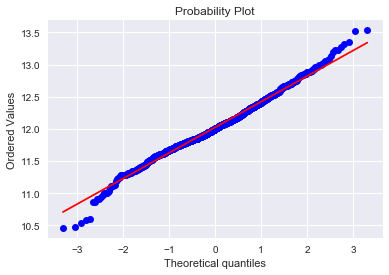

In [37]:
stats.probplot(df_data['SalePrice'], plot=plt)

In [38]:
#Choosing independent and dependent variables
feature_cols = df_data.columns.drop('SalePrice')
X = df_data[feature_cols]
y = df_data.SalePrice

#Importing necessary classes to run simple linear regression
from sklearn.linear_model import LinearRegression

#Training the model to the raw dataset and predicting the values for X
linreg = LinearRegression()
linreg.fit(X, y)
linreg.predict(X)

array([ 12.23188352,  12.19701564,  12.28848845, ...,  12.58642963,
        11.83289972,  11.81347729])

In [39]:
#Caputring the predictions for X to use in MSE
y_prediction = linreg.predict(X)

In [40]:
#MSE from previous model, trying a Test/Train split next to see the outcome
from sklearn import metrics

print(metrics.mean_squared_error(y, y_prediction))

0.00617547490503


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1458, 563) (1458,)
(1093, 563) (1093,)
(365, 563) (365,)


In [43]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train)

print(metrics.mean_squared_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_test, y_pred_test))

#Definitely a more acceptable MSE than before.

0.00517438137712
9921230.25699


In [60]:
#Reading datasent into Jupyter Notebook
df_data = pd.read_csv('/Users/nenelix3/Desktop/DSRemote_Homework/FinalProject_Data.csv')

In [90]:
df_data.loc[df_data.MoSold.isin([12,1,2]),'season'] = 1
df_data.loc[df_data.MoSold.isin([3,4,5]),'season'] = 2
df_data.loc[df_data.MoSold.isin([6,7,8]),'season'] = 3
df_data.loc[df_data.MoSold.isin([9,10,11]),'season'] = 4
df_data.SalePrice = np.log(df_data.SalePrice)
df_data.LotFrontage = df_data.LotFrontage.fillna(df_data.LotFrontage.mean())
df_data.TotalBsmtSF = df_data.TotalBsmtSF.fillna(0)
#Creating total square footage feature
df_data['TotalSF'] = df_data['TotalBsmtSF'] + df_data['1stFlrSF'] + df_data['2ndFlrSF']
df_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [91]:
season_dummies = pd.get_dummies(df_data.season, prefix = 'season')
season_dummies.sample(n = 5, random_state = 1)

,season_1,season_2,season_3,season_4
258,0,1,0,0
267,0,0,1,0
288,1,0,0,0
649,1,0,0,0
1233,0,1,0,0


In [92]:
season_dummies = pd.concat([df_data, season_dummies], axis = 1)
season_dummies.sample(n = 5, random_state = 1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,season,TotalSF,season_1,season_2,season_3,season_4
258,259,60,RL,80.000000,12435,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,2.513845,2,2755,0,1,0,0
267,268,75,RL,60.000000,8400,Pave,NaN,Reg,Bnk,AllPub,...,2008,WD,Normal,2.493034,3,2492,0,0,1,0
288,289,20,RL,70.049958,9819,Pave,NaN,IR1,Lvl,AllPub,...,2010,WD,Normal,2.460595,1,1782,1,0,0,0
649,650,180,RM,21.000000,1936,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,2.428734,1,1260,1,0,0,0
1233,1234,20,RL,70.049958,12160,Pave,NaN,IR1,Lvl,AllPub,...,2010,COD,Abnorml,2.473473,2,2376,0,1,0,0


In [93]:
feature_cols = ['LotArea', 'season_1', 'season_2', 'season_4', 'TotalSF']
X = season_dummies[feature_cols]
y = season_dummies.SalePrice

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('LotArea', 6.0408020271785874e-08),
 ('season_1', -0.0026105639810521048),
 ('season_2', -0.0018235240720967003),
 ('season_4', -0.0019159296430365069),
 ('TotalSF', 3.1032490585943299e-05)]

In [98]:
y_prediction = linreg.predict(X)
from sklearn import metrics

print(metrics.mean_squared_error(y, y_prediction))
print(np.sqrt(metrics.mean_squared_error(y, y_prediction)))

0.000442534132087
0.0210364952425


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train)

print(metrics.mean_squared_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_test, y_pred_test))

0.000485071064313
0.000314923335411
